# 최근접 이웃(KNN)

In [239]:
import pandas as pd
import numpy as np
# 데이터를 수집합니다.
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")
# 수집된 데이터 샘플을 확인합니다.
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [240]:
# 현재 데이터에서 포지션의 개수를 확인한다
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

Text(0.5,1,'AST and 2P in 2d plane')

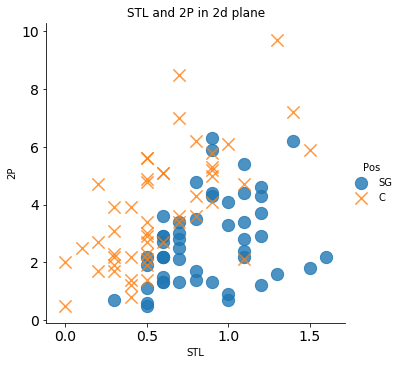

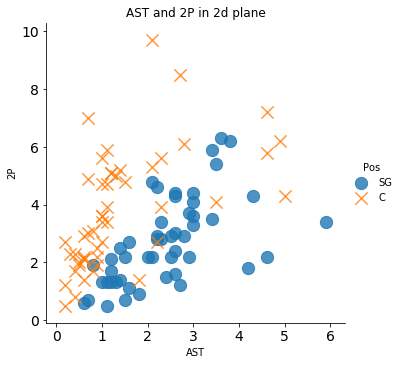

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 스틸, 2점슛 데이터 시각화
sns.lmplot('STL', '2P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
          hue="Pos") # 예측값
# 타이틀
plt.title('STL and 2P in 2d plane')

# 어시스트,2점슛 데이터 시각화
sns.lmplot('AST', '2P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
          hue="Pos") # 예측값
# 타이틀
plt.title('AST and 2P in 2d plane')

Text(0.5,1,'TRB and 3P in 2d plane')

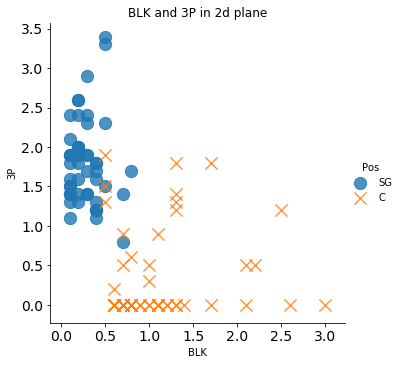

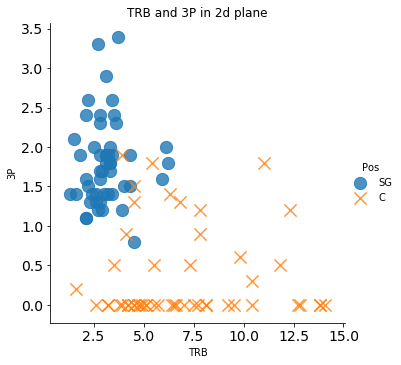

In [242]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK', '3P', data=df, fit_reg=False, 
           scatter_kws={"s":150},
          markers=["o", "x"],
          hue="Pos")
# 타이틀
plt.title('BLK and 3P in 2d plane')

# 리바운드, 3점슛 데이터 시각화
sns.lmplot('TRB', '3P', data=df, fit_reg=False, 
           scatter_kws={"s":150},
          markers=["o", "x"],
          hue="Pos")
# 타이틀
plt.title('TRB and 3P in 2d plane')

In [243]:
# 분별력이 없는 특징(feature)을 데이터에서 제거합니다.
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [244]:
# 사이킷런의 train_test_split을 사용하면 코드 한 줄로 손쉽게 데이터를 나눌 수 있습니다.
from sklearn.model_selection import train_test_split
# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다
train, test = train_test_split(df, test_size=0.2)

In [245]:
train.shape[0]

80

In [246]:
test.shape[0]

20

In [247]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,
                                            scoring='accuracy')
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

[0.8930555555555555,
 0.8658730158730158,
 0.8769841269841269,
 0.900595238095238,
 0.8992063492063492,
 0.8992063492063492,
 0.8992063492063492,
 0.8849206349206348,
 0.8992063492063492,
 0.8849206349206348,
 0.8599206349206348,
 0.8599206349206348,
 0.8331349206349206,
 0.8331349206349206,
 0.8331349206349206,
 0.8095238095238095,
 0.7952380952380952,
 0.7952380952380952,
 0.7952380952380952]

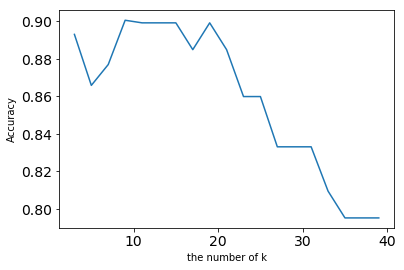

In [248]:
# k에 딸느 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [249]:
# 가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 9


In [250]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용될 속성을 지정
x_train = train[['3P', 'BLK', 'TRB']]
# 선수 포지션을 예측할 값으로 지정
y_train = train[['Pos']]

# knn 모델 학습
knn.fit(x_train, y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용도리 속성을 지정
x_test = test[['3P', 'BLK', 'TRB']]

# 선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

# 테스트 시작
pred = knn.predict(x_test)

# 모델 예측 정확도(accuracy) 출력
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.95


In [251]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,C,C
2,SG,SG
3,C,C
4,C,C
5,SG,SG
6,SG,SG
7,C,SG
8,SG,SG
9,SG,SG


# 서포트 벡터 머신(SVM)

In [252]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np


def svc_param_selection(x, y, nfolds):
    svm_parameters = [
                        {'kernel' : ['rbf'],
                         'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                         'C': [0.01, 0.1, 1, 10, 100, 1000]}
                     ]
    # 사이킷런에서 제공하는 GridSearchCV를 사용해 최적의 파라미터를 구함
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(x_train, y_train.values.ravel())
    print(clf.best_params_)

    return clf

# 3점슛과 블로킹 횟수를 학습 데이터로 사용
x_train = train[['3P', 'BLK']]

# 농구선수 포지션을 예측값으로 선정
y_train = train[['Pos']]

# 최적의 파라미터로 학습된 모델을 clf로 저장
clf = svc_param_selection(x_train, y_train.values.ravel(), 10)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


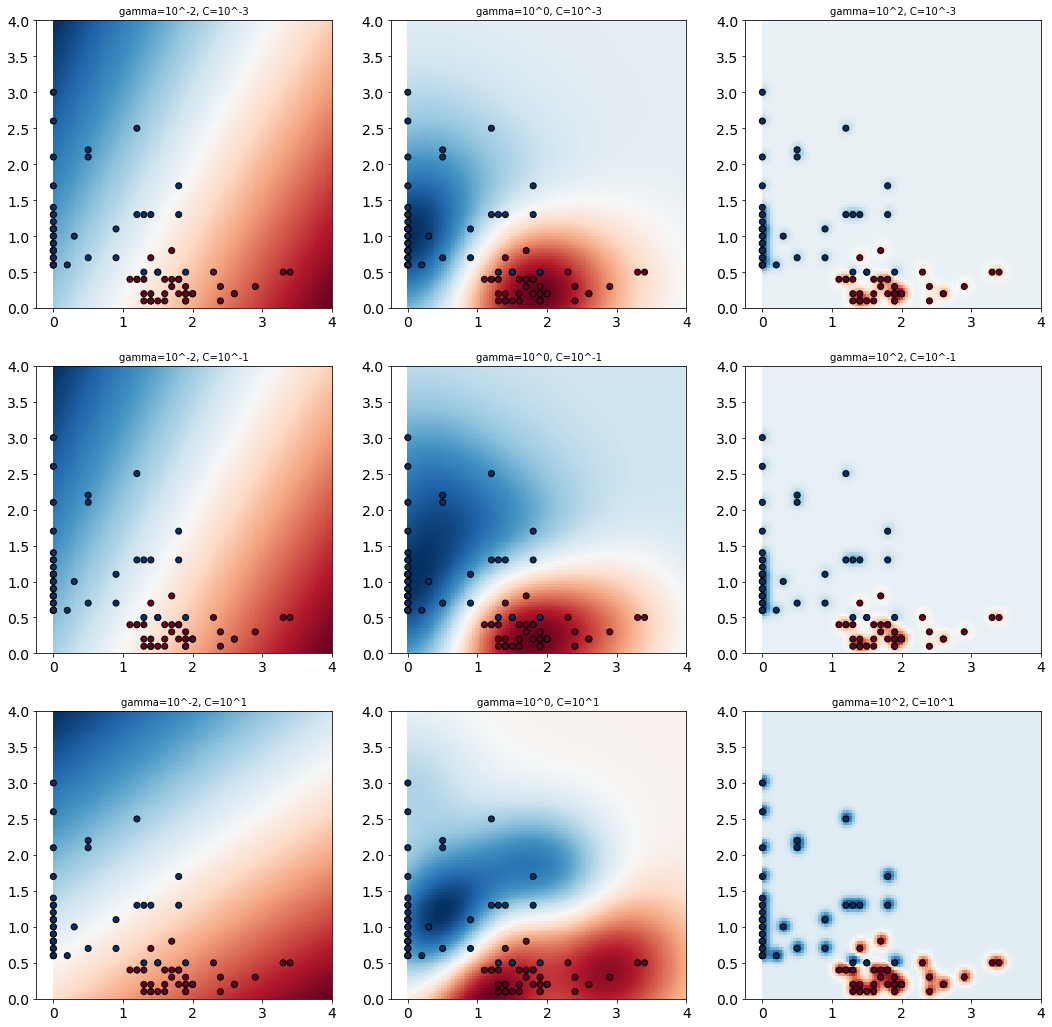

In [253]:
# 시각화할 비용 후보들을 저장
C_canditates = []
C_canditates.append(clf.best_params_['C'] * 0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C'] * 100)

# 시각화할 감마 후보들을 저장
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)

# 3점슛과 블로킹 횟수로 학습
x = train[['3P', 'BLK']]
# 농구선수 포지션을 학습 모델의 분류값으로 사용
y = train['Pos'].tolist()

# 시각화를 위해 센터(C)와 슈팅가드(SG)를 숫자료 표현
position = []
for gt in y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

classifiers = []

# 파라미터 후보들을 조합해서 학습된 모델들을 저장
for C in C_canditates:
    for gamma in gamma_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(x, y)
        classifiers.append((C, gamma, clf))
        
# 각 모델을 시각화
plt.figure(figsize=(18, 18))
xx, yy, = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(len(C_canditates), len(gamma_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
             size='medium')
    
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(x['3P'], x['BLK'], c=position, cmap=plt.cm.RdBu_r,
               edgecolors='k')

In [254]:
x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

# 최적의 파라미터로 학습된 모델로 테스트를 진행
y_true, y_pred = y_test, clf.predict(x_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy : " + str(accuracy_score(y_true, y_pred)) )

             precision    recall  f1-score   support

          C       0.80      1.00      0.89         8
         SG       1.00      0.83      0.91        12

avg / total       0.92      0.90      0.90        20


accuracy : 0.9


In [255]:
comparison = pd.DataFrame({'prediction':y_pred,
                          'ground_truth':y_true.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,C,C
2,SG,SG
3,C,C
4,C,C
5,SG,SG
6,SG,SG
7,C,SG
8,SG,SG
9,SG,SG


# 의사결정 트리

In [256]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]

In [257]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

In [258]:
train_df.label.value_counts()

Gangnam     5
Gangseo     5
Gangdong    5
Gangbuk     5
Name: label, dtype: int64

In [259]:
test_df.label.value_counts()

Gangnam     5
Gangseo     5
Gangdong    5
Gangbuk     5
Name: label, dtype: int64

In [260]:
train_df.head()

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo


Text(0.5,1,'district visualization in 2d plane')

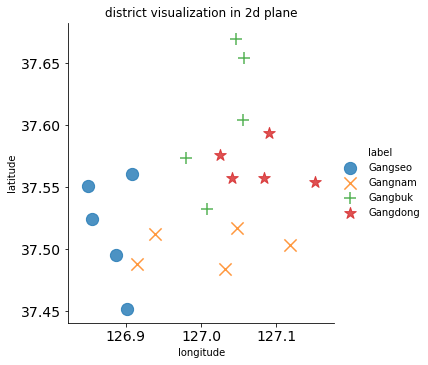

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('longitude', 'latitude', data=train_df, fit_reg=False,
          scatter_kws={"s":150},
          markers=["o", "x", "+", "*"],
          hue="label")
# title
plt.title('district visualization in 2d plane')

In [262]:
train_df.drop(['district'], axis=1, inplace=True)
test_df.drop(['dong'], axis=1, inplace=True)

X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [263]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [264]:
def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
                   c=color, label=le.classes_[i],
                   cmap=plt.cm.RdYlBu, edgecolor='black', s=200)
    
    plt.title("Decision surface of a decision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1),
              loc=2, borderaxespad=0., fontsize=14)
    
    plt.xlabel('longitude', fontsize=16)
    plt.ylabel('latitude', fontsize=16)
    plt.rcParams["figure.figsize"] = [7, 5]
    plt.rcParams["font.size"] = 14
    plt.rcParams["xtick.labelsize"] = 14
    plt.rcParams["ytick.labelsize"] = 14
    plt.show()

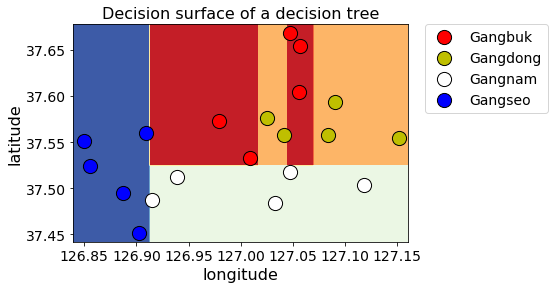

In [265]:
display_decision_surface(clf, X_train, y_encoded)

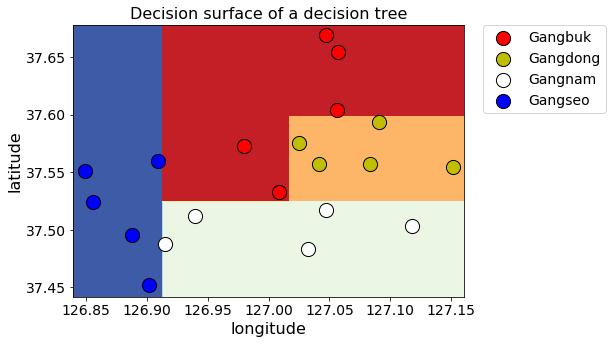

In [266]:
clf = tree.DecisionTreeClassifier(max_depth = 4,
                                 min_samples_split = 2,
                                 min_samples_leaf = 2,
                                 random_state = 70).fit(X_train, y_encoded.ravel())
display_decision_surface(clf, X_train, y_encoded)

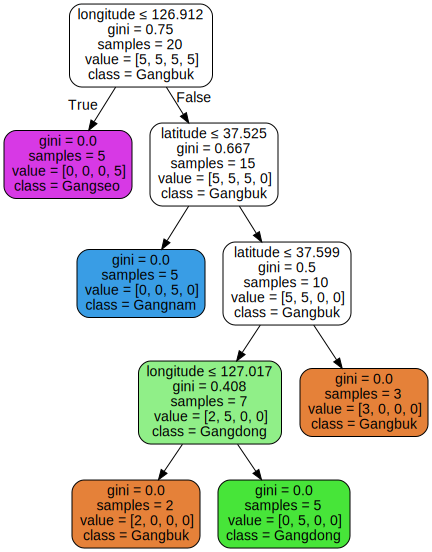

In [267]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("seoul")
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names = ['longitude', 'latitude'],
                               class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],
                               filled=True, rounded=True,
                               special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [268]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)

In [269]:
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), le.classes_[pred])))

accuracy : 1.0


In [270]:
comparison2 = pd.DataFrame({'prediction':le.classes_[pred],
                           'ground_truth':y_test.values.ravel()})
comparison2

,prediction,ground_truth
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


# 나이브 베이즈

In [271]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [272]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.map({0:"setosa", 1:"versicolor", 2:"virginica"})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


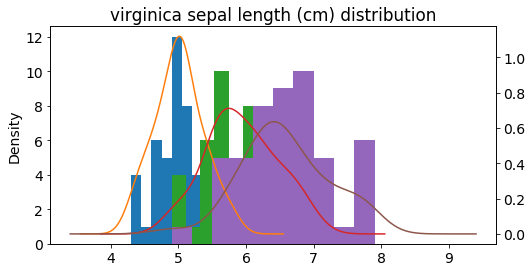

In [273]:
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target == "versicolor"]
virginica_df = df[df.target == "virginica"]

ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', ax=ax,
                                   secondary_y=True,
                                   title = "setosa sepal length (cm) distribution",
                                   figsize = (8,4))
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde', ax=ax,
                                   secondary_y=True,
                                   title = "versicolor sepal length (cm) distribution",
                                   figsize = (8,4))
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde', ax=ax,
                                   secondary_y=True,
                                   title = "virginica sepal length (cm) distribution",
                                   figsize = (8,4))

In [274]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

In [275]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [276]:
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        30



In [277]:
accuracy_score(y_test, predicted)

1.0

In [278]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [279]:
# 데이터 획득
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]
df = pd.DataFrame(email_list)

In [280]:
df['label'] = df['spam'].map({True:1, False:0})

In [281]:
df_x = df["email title"]
df_y = df["label"]

In [282]:
cv = CountVectorizer(binary=True)
x_traincv=cv.fit_transform(df_x)

In [283]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [284]:
cv.inverse_transform(encoded_input[0])

[array(['free', 'game', 'only', 'today'], dtype='<U9')]

In [285]:
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [286]:
bnb = BernoulliNB()
y_train = df_y.astype('int')
bnb.fit(x_traincv, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [287]:
# 테스트 데이터 다듬기
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]
test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True:1,False:0})
test_x=test_df["email title"]
test_y=test_df["label"]
x_testcv=cv.transform(test_x)

In [288]:
predictions = bnb.predict(x_testcv)

In [289]:
accuracy_score(test_y, predictions)

0.8333333333333334

In [290]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [291]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]
df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [292]:
# 데이터 다듬기
df['label'] = df['type'].map({"positive":1, "negative":0})

In [293]:
df_x = df["movie_review"]
df_y = df["label"]

In [294]:
cv = CountVectorizer()
x_traincv=cv.fit_transform(df_x)
encoded_input=x_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [295]:
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [296]:
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [297]:
mnb = MultinomialNB()
y_train = df_y.astype('int')
mnb.fit(x_traincv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [298]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]
test_df = pd.DataFrame(test_feedback_list)
test_df['label'] = test_df['type'].map({"positive":1,"negative":0})
test_x=test_df["movie_review"]
test_y=test_df["label"]

In [299]:
x_testcv = cv.transform(test_x)
predictions = mnb.predict(x_testcv)

In [300]:
accuracy_score(test_y, predictions)

1.0

In [301]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [302]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [303]:
def cross_validation(classifier, features, labels):
    cv_scores = []
    for i in range(10):
        scores = cross_val_score(classifier, features, labels,
                                cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
    return cv_scores

In [304]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


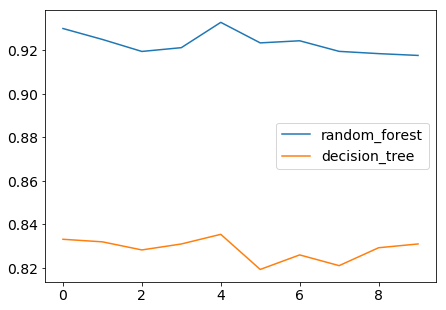

In [305]:
cv_list = [
            ['random_forest', rf_cv_scores],
            ['decision_tree', dt_cv_scores],
        ]

df = pd.DataFrame.from_items(cv_list)
df.plot()

In [306]:
np.mean(dt_cv_scores)

0.8285304256674367

In [307]:
np.mean(rf_cv_scores)

0.9230958545942392

# 앙상블

In [308]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [309]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [310]:
dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth=8,
                                   max_features=32, random_state=35)
dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
print("[accuracy]")
print("d-tree: ", accuracy_score(y_test, dtree_predicted))
print("knn   : ", accuracy_score(y_test, knn_predicted))
print("svm   : ", accuracy_score(y_test, svm_predicted))

[accuracy]
d-tree:  0.8944444444444445
knn   :  0.8583333333333333
svm   :  0.9138888888888889


In [311]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[0.0047174  0.01143431 0.01228206 0.03363949 0.00725407 0.02308076
  0.00400911 0.0216764  0.06572193 0.81618447]
 [0.01164607 0.00506035 0.00519392 0.00448873 0.00463973 0.0160179
  0.9261702  0.00596341 0.01276603 0.00805366]]


In [312]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], voting='hard').fit(X_train, y_train)

hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9472222222222222

In [313]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], voting='soft').fit(X_train, y_train)

soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9333333333333333

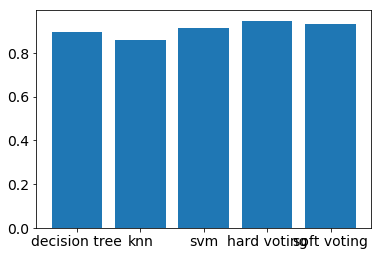

In [314]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);

# 군집화

In [315]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [316]:
df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185, 60]
df.loc[1] = [180, 60]
df.loc[2] = [185, 70]
df.loc[3] = [165, 63]
df.loc[4] = [155, 68]
df.loc[5] = [170, 75]
df.loc[6] = [175, 80]

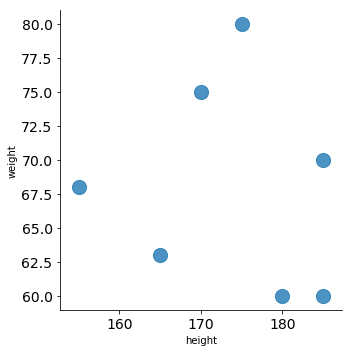

In [317]:
sns.lmplot('height', 'weight',
          data=df, fit_reg=False,
          scatter_kws={"s":200})

In [318]:
data_points = df.values
kmeans = KMeans(n_clusters=3).fit(data_points)

In [319]:
kmeans.cluster_centers_

array([[183.33333333,  63.33333333],
       [160.        ,  65.5       ],
       [172.5       ,  77.5       ]])

In [320]:
df['cluster_id'] = kmeans.labels_

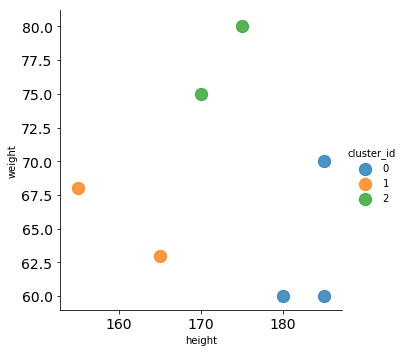

In [321]:
sns.lmplot('height', 'weight', data=df, fit_reg=False,
          scatter_kws={"s":150},
          hue="cluster_id")

# 선형회귀

In [322]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [323]:
X = np.linspace(0, 10, 10)
Y = X + np.random.randn(*X.shape)

In [324]:
for x, y in zip(X,Y):
    print((round(x,1), round(y,1)))

(0.0, -0.6)
(1.1, 2.8)
(2.2, 2.2)
(3.3, 3.5)
(4.4, 3.7)
(5.6, 6.4)
(6.7, 7.1)
(7.8, 8.1)
(8.9, 8.7)
(10.0, 8.3)


In [325]:
model = Sequential()
model.add(Dense(input_dim=1, units=1, activation="linear", use_bias=False))

In [326]:
sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer='sgd', loss='mse')

In [327]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
print('initial w is : ' + str(w))

initial w is : 1.4236544


In [328]:
model.fit(X, Y, batch_size=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 0s 40ms/sample - loss: 7.9366
Epoch 2/10
10/10 [==============================] - 0s 100us/sample - loss: 1.3809
Epoch 3/10
10/10 [==============================] - 0s 600us/sample - loss: 0.8054
Epoch 4/10
10/10 [==============================] - 0s 400us/sample - loss: 0.7548
Epoch 5/10
10/10 [==============================] - 0s 100us/sample - loss: 0.7504
Epoch 6/10
10/10 [==============================] - 0s 100us/sample - loss: 0.7500
Epoch 7/10
10/10 [==============================] - 0s 100us/sample - loss: 0.7500
Epoch 8/10
10/10 [==============================] - 0s 100us/sample - loss: 0.7500
Epoch 9/10
10/10 [==============================] - 0s 100us/sample - loss: 0.7500
Epoch 10/10
10/10 [==============================] - 0s 100us/sample - loss: 0.7500


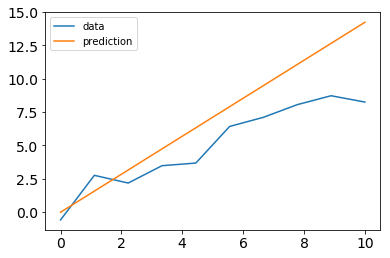

In [329]:
plt.plot(X, Y, label='data')
plt.plot(X, w*X, label='prediction')
plt.legend()
plt.show()

In [330]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

In [331]:
model = Sequential()
#입력 1개를 받아 출력 1개를 리턴하는 선형 회귀 레이어를 생성합니다.
model.add(Dense(input_dim=1, units=1))
#선형 회귀의 출력값을 시그모이드에 연결합니다.
model.add(Activation('sigmoid'))
#크로스 엔트로피를 비용함수로 설정해 경사하강법으로 학습합니다.
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])

In [332]:
X = np.array([-2, -1.5, -1, 1.25, 1.62, 2])
Y = np.array([0, 0, 0, 1, 1, 1])

In [333]:
model.fit(X, Y, epochs=300, verbose=0)

In [334]:
model.predict([-2, -1.5, -1, -1.25, 1.62, 2])

array([[0.15596262],
       [0.21969646],
       [0.30021128],
       [0.25790924],
       [0.79584146],
       [0.8429804 ]], dtype=float32)

In [335]:
model.predict([-1000, 1000])

array([[0.],
       [1.]], dtype=float32)

In [336]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [337]:
model.layers[0].weights

[<tf.Variable 'dense_5/kernel:0' shape=(1, 1) dtype=float32>,
 <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32>]

In [338]:
model.layers[0].get_weights()

[array([[0.84228826]], dtype=float32), array([-0.00400375], dtype=float32)]

# 로지스틱 회귀

In [339]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

In [340]:
model = Sequential()
#2개의입력을 받아 1개의 출력을 리턴합니다.
model.add(Dense(input_dim=2, units=1))
#이전 레이어의 출력값을 입력으로 받아 시그모이드 출력을 리턴합니다.
model.add(Activation('sigmoid'))
#크로스 엔트로피 비용함수를 사용해 경사하강법으로 학습을 진행합니다.
#binary_accuracy는 출력이 0.5 이상일 경우 출력을 1로 판단하고,
#이하일 경우 0으로 판단합니다.
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])

In [341]:
X = np.array([(0,0), (0,1), (1,0), (1,1)])
Y = np.array([0, 0, 0, 1])

In [342]:
model.fit(X, Y, epochs=5000, verbose=0)

In [343]:
model.predict(X)

array([[0.03348091],
       [0.21845505],
       [0.21086198],
       [0.68315226]], dtype=float32)

In [344]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [345]:
model.layers[0].weights

[<tf.Variable 'dense_6/kernel:0' shape=(2, 1) dtype=float32>,
 <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32>]

In [346]:
model.layers[0].get_weights()

[array([[2.0429885],
        [2.0880337]], dtype=float32), array([-3.362726], dtype=float32)]

In [347]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [348]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [349]:
print("train data (count, row, column) : " + str(X_train.shape))
print("test data (count, row, column) : " + str(X_test.shape))

train data (count, row, column) : (60000, 28, 28)
test data (count, row, column) : (10000, 28, 28)


In [350]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [351]:
print("train target (count) : " + str(y_train.shape))
print("test target (count) : " + str(y_test.shape))

train target (count) : (60000,)
test target (count) : (10000,)


In [352]:
print("sample from train : " + str(y_train[0]))
print("sample from test : " + str(y_test[0]))

sample from train : 5
sample from test : 7


In [353]:
input_dim = 784 #28 * 28
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)

In [354]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [355]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [356]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [357]:
model = Sequential()
model.add(Dense(input_dim=input_dim, units=10, activation='softmax'))

In [358]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=2048, epochs=100, verbose=0)

In [359]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 93us/sample - loss: 0.4221 - acc: 0.8914
Test accuracy: 0.8914


In [360]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [361]:
model.layers[0].weights

[<tf.Variable 'dense_7/kernel:0' shape=(784, 10) dtype=float32>,
 <tf.Variable 'dense_7/bias:0' shape=(10,) dtype=float32>]

# 주성분 분석

In [362]:
import pandas as pd
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner',
                          'exercise', 'body_shape'])

In [363]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [364]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [365]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]

In [366]:
X.head()

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


In [367]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [368]:
print(x_std)

[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


In [369]:
Y = df[['body_shape']]

In [370]:
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [371]:
import numpy as np
features = x_std.T
covariance_matrix = np.cov(features)

In [372]:
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [373]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [374]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [375]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [376]:
eig_vals[0] / sum(eig_vals)

0.7318321731427544

In [377]:
projected_X = x_std.dot(eig_vecs.T[0]) / np.linalg.norm(eig_vecs.T[0])

In [378]:
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [379]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [380]:
result.head(10)

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


Text(0.5,1,'PCA result')

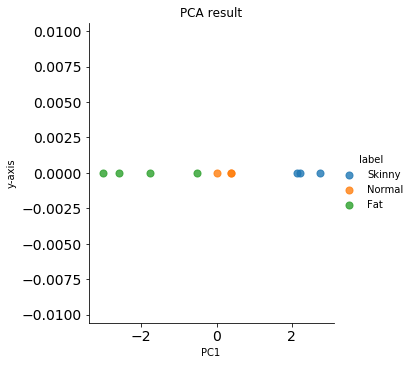

In [381]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

plt.title('PCA result')

In [382]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

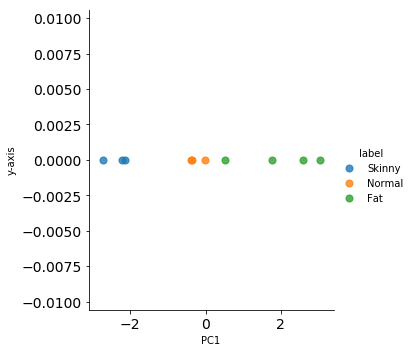

In [383]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color